In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
with open('/kaggle/input/result-statistics/UP_result_summary.csv', 'r') as file:
    reader = csv.reader(file)
    # 跳过标题行
    next(reader)

    # 创建两个空列表来存储提取出的浮点数
    test_acc_UP = []

    # 遍历每一行
    for row in reader:
        # 假设第一列和第二列是你要处理的那两列
        value_str2 = row[4]

        value_float2 = float(value_str2)
        test_acc_UP.append(value_float2)

In [16]:


data = pd.read_csv('/kaggle/input/result-statistics/UP_result_summary.csv')
# 读取CSV文件
file_path = '/kaggle/input/with-train/up_output.csv'
df = pd.read_csv(file_path)

# 计算每个Run的平均值
mean_df = df.groupby('Run').mean()
# 提取所需的列
run = data['Run']
avg_val_loss_UP = mean_df['Val Loss']
avg_val_acc_UP = mean_df['Val Accuracy']
train_loss_UP = mean_df['Train Loss']
train_acc_UP = mean_df['Train Accuracy']

val_acc_mean_UP = np.mean(avg_val_acc_UP)
val_acc_std_UP = np.std(avg_val_acc_UP)
test_acc_mean_UP = np.mean(test_acc_UP)
test_acc_std_UP = np.std(test_acc_UP)

val_loss_mean_UP = np.mean(avg_val_loss_UP)
val_loss_std_UP = np.std(avg_val_loss_UP)
train_loss_mean_UP = np.mean(train_loss_UP)
train_loss_std_UP = np.std(train_loss_UP)

# # 创建二维散点图
# fig1, ax1 = plt.subplots(figsize=(12, 8))

# # 绘制第一条折线
# ax1.plot(run, avg_val_loss_UP, marker='o', label='avg_val_loss')

# # 绘制第二条折线
# ax1.plot(run, train_loss_UP, marker='s', label='train_loss')

# # 设置标题和坐标轴标签
# ax1.set_title('loss of UP with alpha = 0.4 and k = 9', fontsize = 16)
# ax1.set_xlabel('times of run')
# ax1.set_ylabel('loss')

# ax1.text(
#     0, 1, 
#     f"Validation Loss Mean: {val_loss_mean_UP:.2f}, Validation Loss Std: {val_loss_std_UP:.2f}\n"
#     f"Train Loss Mean: {train_loss_mean_UP:.2f}, Train Loss Std: {train_loss_std_UP:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax1.transAxes
# )

# # 显示图例
# ax1.legend(loc='upper right')

# fig2, ax2 = plt.subplots(figsize=(12, 8))

# ax2.plot(run, avg_val_acc_UP, marker='o', label='avg_val_acc')
# ax2.plot(run, test_acc_UP, marker='s', label='test_acc')
# ax2.set_title('accuracy of UP with alpha = 0.4 and k = 9', fontsize=16)
# ax2.set_xlabel('times of run')
# ax2.set_ylabel('accuracy')

# ax2.text(
#     0, 1, 
#     f"Validation Accuracy Mean: {val_acc_mean_UP:.2f}, Validation Accuracy Std: {val_acc_std_UP:.2f}\n"
#     f"Test Accuracy Mean: {test_acc_mean_UP:.2f}, Test Accuracy Std: {test_acc_std_UP:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax2.transAxes
# )

# ax2.legend(loc='upper right')

# # 显示图形
# plt.show()

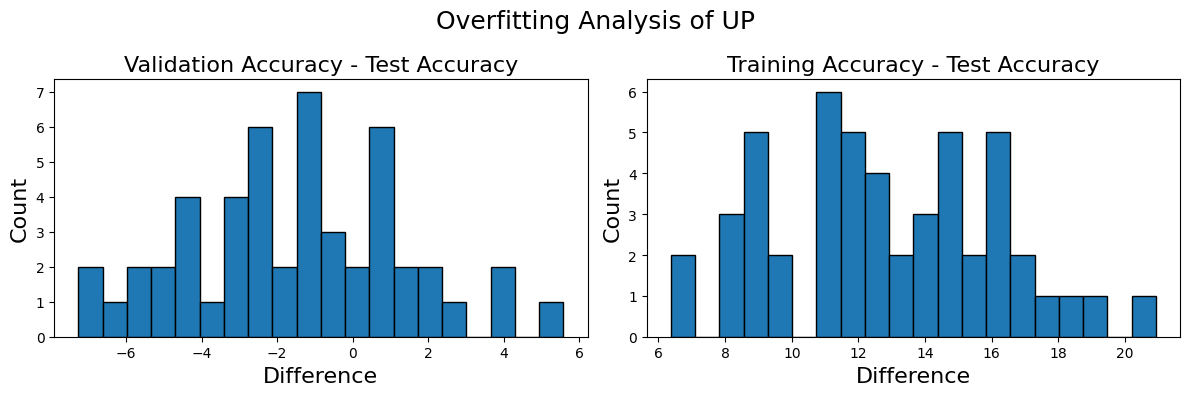

In [17]:


# 计算差值
val_minus_test = avg_val_acc_UP - test_acc_UP
train_minus_test = train_acc_UP - test_acc_UP

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Overfitting Analysis of UP', fontsize=18)
#
axs[0].hist(val_minus_test, bins=20, edgecolor='black')
axs[0].set_title('Validation Accuracy - Test Accuracy', fontsize=16)
axs[0].set_xlabel('Difference', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)

# 训练集与测试集准确率差值的直方图
axs[1].hist(train_minus_test, bins=20, edgecolor='black')
axs[1].set_title('Training Accuracy - Test Accuracy', fontsize=16)
axs[1].set_xlabel('Difference', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)

plt.tight_layout()
plt.savefig('diff_UP.png')
plt.show()


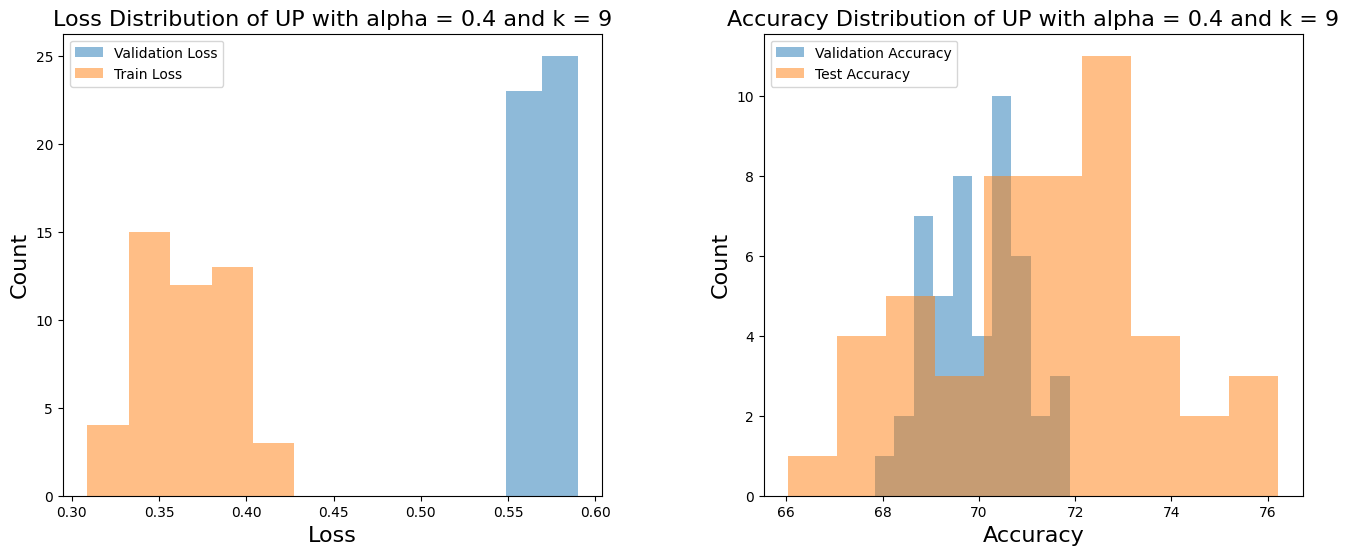

In [18]:
# 设置 x 轴范围
val_loss_range = (val_loss_mean_UP - 2 * val_loss_std_UP, val_loss_mean_UP + 2 * val_loss_std_UP)
train_loss_range = (train_loss_mean_UP - 2 * train_loss_std_UP, train_loss_mean_UP + 2 * train_loss_std_UP)
val_acc_range = (val_acc_mean_UP - 2 * val_acc_std_UP, val_acc_mean_UP + 2 * val_acc_std_UP)
test_acc_range = (test_acc_mean_UP - 2 * test_acc_std_UP, test_acc_mean_UP + 2 * test_acc_std_UP)

# 计算每个范围内的数据点数量
val_loss_counts, val_loss_bins = np.histogram(avg_val_loss_UP, bins=2, range=val_loss_range, density=False)
train_loss_counts, train_loss_bins = np.histogram(train_loss_UP, bins=5, range=train_loss_range, density=False)
val_acc_counts, val_acc_bins = np.histogram(avg_val_acc_UP, bins=10, range=val_acc_range, density=False)
test_acc_counts, test_acc_bins = np.histogram(test_acc_UP, bins=10, range=test_acc_range, density=False)

# 设置图形大小
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制第一个柱状图
ax1.bar(val_loss_bins[:-1], val_loss_counts, width=val_loss_bins[1] - val_loss_bins[0], alpha=0.5, label='Validation Loss')
ax1.bar(train_loss_bins[:-1], train_loss_counts, width=train_loss_bins[1] - train_loss_bins[0], alpha=0.5, label='Train Loss')
ax1.set_title('Loss Distribution of UP with alpha = 0.4 and k = 9', fontsize=16)
ax1.set_xlabel('Loss', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.legend()

# 绘制第二个柱状图
ax2.bar(val_acc_bins[:-1], val_acc_counts, width=val_acc_bins[1] - val_acc_bins[0], alpha=0.5, label='Validation Accuracy')
ax2.bar(test_acc_bins[:-1], test_acc_counts, width=test_acc_bins[1] - test_acc_bins[0], alpha=0.5, label='Test Accuracy')
ax2.set_title('Accuracy Distribution of UP with alpha = 0.4 and k = 9', fontsize=16)
ax2.set_xlabel('Accuracy', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.legend()

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)
plt.savefig('distribution_UP.png')
# 显示图形
plt.show()

In [19]:
import csv
import re

# 打开CSV文件
with open('/kaggle/input/result-statistics/GL_result_summary.csv', 'r') as file:
    reader = csv.reader(file)
    # 跳过标题行
    next(reader)

    # 创建两个空列表来存储提取出的浮点数
    test_acc_GL = []

    # 遍历每一行
    for row in reader:
        # 假设第一列和第二列是你要处理的那两列
        value_str2 = row[4]

        # 处理第二列
        start = value_str2.find('(') + 1
        end = value_str2.find(',')
        float_str2 = value_str2[start:end]
        value_float2 = float(float_str2)
        test_acc_GL.append(value_float2)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/kaggle/input/result-statistics/GL_result_summary.csv')

# 提取所需的列
file_path = '/kaggle/input/with-train/GL_output.csv'
df = pd.read_csv(file_path)

# 计算每个Run的平均值
mean_df = df.groupby('Run').mean()
# 提取所需的列
run = data['Run']
avg_val_loss_GL = mean_df['Val Loss']
avg_val_acc_GL = mean_df['Val Accuracy']
train_loss_GL = mean_df['Train Loss']
train_acc_GL = mean_df['Train Accuracy']

run = data['Run']

val_acc_mean_GL = np.mean(avg_val_acc_GL)
val_acc_std_GL = np.std(avg_val_acc_GL)
test_acc_mean_GL = np.mean(test_acc_GL)
test_acc_std_GL = np.std(test_acc_GL)

val_loss_mean_GL = np.mean(avg_val_loss_GL)
val_loss_std_GL = np.std(avg_val_loss_GL)
train_loss_mean_GL = np.mean(train_loss_GL)
train_loss_std_GL = np.std(train_loss_GL)

# # 创建二维散点图
# fig1, ax1 = plt.subplots(figsize=(12, 8))

# # 绘制第一条折线
# ax1.plot(run, avg_val_loss_GL, marker='o', label='avg_val_loss')

# # 绘制第二条折线
# ax1.plot(run, train_loss_GL, marker='s', label='train_loss')

# # 设置标题和坐标轴标签
# ax1.set_title('loss of GL with alpha = 1.1', fontsize = 16)
# ax1.set_xlabel('times of run')
# ax1.set_ylabel('loss')

# ax1.text(
#     0, 1, 
#     f"Validation Loss Mean: {val_loss_mean_GL:.2f}, Validation Loss Std: {val_loss_std_GL:.2f}\n"
#     f"train Loss Mean: {train_loss_mean_GL:.2f}, train Loss Std: {train_loss_std_GL:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax1.transAxes
# )

# # 显示图例
# ax1.legend()

# fig2, ax2 = plt.subplots(figsize=(12, 8))

# ax2.plot(run, avg_val_acc_GL, marker='o', label='avg_val_acc')
# ax2.plot(run, test_acc_GL, marker='s', label='test_acc')
# ax2.set_title('accuracy of GL with alpha = 1.1', fontsize=16)
# ax2.set_xlabel('times of run')
# ax2.set_ylabel('accuracy')
# ax2.legend()

# ax2.text(
#     0, 1, 
#     f"Validation Accuracy Mean: {val_acc_mean_GL:.2f}, Validation Accuracy Std: {val_acc_std_GL:.2f}\n"
#     f"Test Accuracy Mean: {test_acc_mean_GL:.2f}, Test Accuracy Std: {test_acc_std_GL:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax2.transAxes
# )
# # 显示图形
# plt.show()

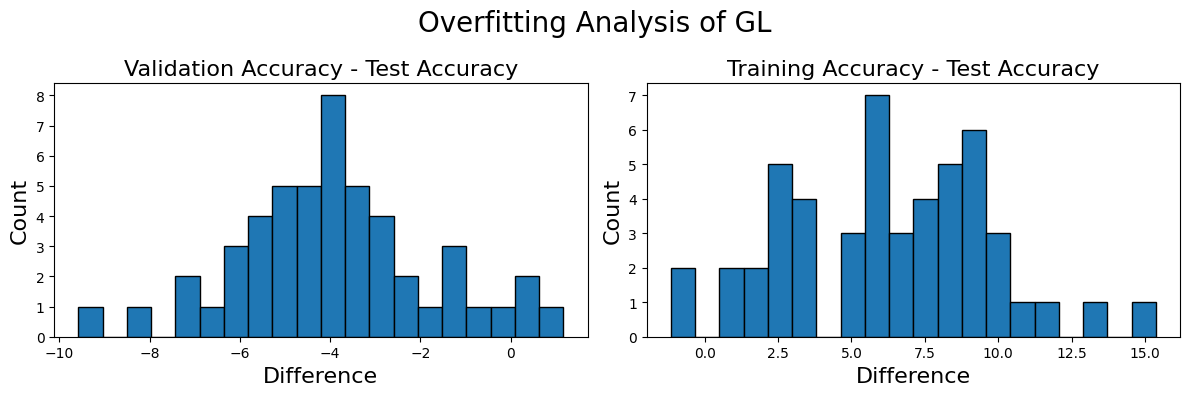

In [21]:
# 计算差值
val_minus_test = avg_val_acc_GL - test_acc_GL
train_minus_test = train_acc_GL - test_acc_GL

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Overfitting Analysis of GL', fontsize=20)
#
axs[0].hist(val_minus_test, bins=20, edgecolor='black')
axs[0].set_title('Validation Accuracy - Test Accuracy', fontsize=16)
axs[0].set_xlabel('Difference', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)

# 训练集与测试集准确率差值的直方图
axs[1].hist(train_minus_test, bins=20, edgecolor='black')
axs[1].set_title('Training Accuracy - Test Accuracy', fontsize=16)
axs[1].set_xlabel('Difference', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)

plt.tight_layout()
plt.savefig('diff_GL.png')
plt.show()

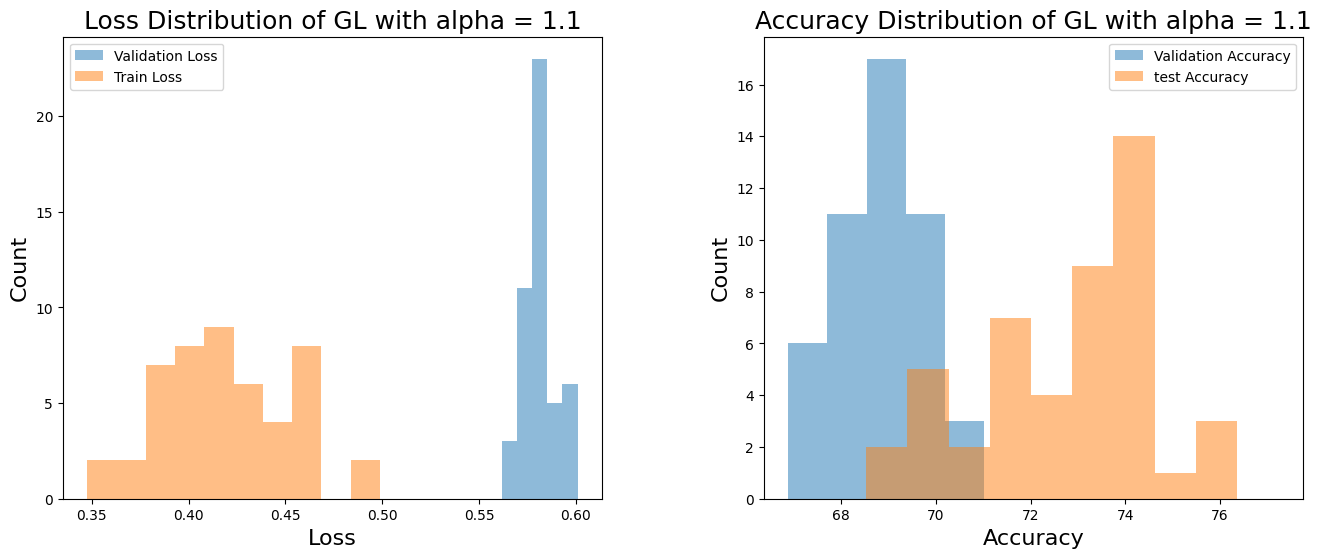

In [22]:
# 设置 x 轴范围
val_loss_range = (val_loss_mean_GL - 2 * val_loss_std_GL, val_loss_mean_GL + 2 * val_loss_std_GL)
train_loss_range = (train_loss_mean_GL - 2 * train_loss_std_GL, train_loss_mean_GL + 2 * train_loss_std_GL)
val_acc_range = (val_acc_mean_GL - 2 * val_acc_std_GL, val_acc_mean_GL + 2 * val_acc_std_GL)
test_acc_range = (test_acc_mean_GL - 2 * test_acc_std_GL, test_acc_mean_GL + 2 * test_acc_std_GL)

# 计算每个范围内的数据点数量
val_loss_counts, val_loss_bins = np.histogram(avg_val_loss_GL, bins=5, range=val_loss_range, density=False)
train_loss_counts, train_loss_bins = np.histogram(train_loss_GL, bins=10, range=train_loss_range, density=False)
val_acc_counts, val_acc_bins = np.histogram(avg_val_acc_GL, bins=5, range=val_acc_range, density=False)
test_acc_counts, test_acc_bins = np.histogram(test_acc_GL, bins=10, range=test_acc_range, density=False)

# 设置图形大小
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制第一个柱状图
ax1.bar(val_loss_bins[:-1], val_loss_counts, width=val_loss_bins[1] - val_loss_bins[0], alpha=0.5, label='Validation Loss')
ax1.bar(train_loss_bins[:-1], train_loss_counts, width=train_loss_bins[1] - train_loss_bins[0], alpha=0.5, label='Train Loss')
ax1.set_title('Loss Distribution of GL with alpha = 1.1', fontsize=18)
ax1.set_xlabel('Loss', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.legend()

# 绘制第二个柱状图
ax2.bar(val_acc_bins[:-1], val_acc_counts, width=val_acc_bins[1] - val_acc_bins[0], alpha=0.5, label='Validation Accuracy')
ax2.bar(test_acc_bins[:-1], test_acc_counts, width=test_acc_bins[1] - test_acc_bins[0], alpha=0.5, label='test Accuracy')
ax2.set_title('Accuracy Distribution of GL with alpha = 1.1', fontsize=18)
ax2.set_xlabel('Accuracy', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.legend()

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)
plt.savefig('distribution_GL.png')
# 显示图形
plt.show()

In [23]:
with open('/kaggle/input/result-statistics/PQ_result_summary.csv', 'r') as file:
    reader = csv.reader(file)
    # 跳过标题行
    next(reader)

    # 创建两个空列表来存储提取出的浮点数
    test_acc_PQ = []

    # 遍历每一行
    for row in reader:
        # 假设第一列和第二列是你要处理的那两列
        value_str2 = row[4]

        # 处理第二列
        start = value_str2.find('(') + 1
        end = value_str2.find(',')
        float_str2 = value_str2[start:end]
        value_float2 = float(float_str2)
        test_acc_PQ.append(value_float2)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/kaggle/input/result-statistics/PQ_result_summary.csv')

# 提取所需的列
file_path = '/kaggle/input/with-train/PQ_output.csv'
df = pd.read_csv(file_path)

# 计算每个Run的平均值
mean_df = df.groupby('Run').mean()
# 提取所需的列
run = data['Run']
avg_val_loss_PQ = mean_df['Val Loss']
avg_val_acc_PQ = mean_df['Val Accuracy']
train_loss_PQ = mean_df['Train Loss']
train_acc_PQ = mean_df['Train Accuracy']
run = data['Run']

val_acc_mean_PQ = np.mean(avg_val_acc_PQ)
val_acc_std_PQ = np.std(avg_val_acc_PQ)
test_acc_mean_PQ = np.mean(test_acc_PQ)
test_acc_std_PQ = np.std(test_acc_PQ)

val_loss_mean_PQ = np.mean(avg_val_loss_PQ)
val_loss_std_PQ = np.std(avg_val_loss_PQ)
train_loss_mean_PQ = np.mean(train_loss_PQ)
train_loss_std_PQ = np.std(train_loss_PQ)

# # 创建二维散点图
# fig1, ax1 = plt.subplots(figsize=(12, 8))

# # 绘制第一条折线
# ax1.plot(run, avg_val_loss_PQ, marker='o', label='avg_val_loss')

# # 绘制第二条折线
# ax1.plot(run, train_loss_PQ, marker='s', label='train_loss')

# # 设置标题和坐标轴标签
# ax1.set_title('loss of PQ with alpha = 1.3 and k = 10', fontsize = 16)
# ax1.set_xlabel('times of run')
# ax1.set_ylabel('loss')
# # 添加独立的图例

# ax1.text(
#     0, 1, 
#     f"Validation Loss Mean: {val_loss_mean_PQ:.2f}, Validation Loss Std: {val_loss_std_PQ:.2f}\n"
#     f"train Loss Mean: {train_loss_mean_PQ:.2f}, train Loss Std: {train_loss_std_PQ:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax1.transAxes
# )

# # 显示图例
# ax1.legend()

# fig2, ax2 = plt.subplots(figsize=(12, 8))

# ax2.plot(run, avg_val_acc_PQ, marker='o', label='avg_val_acc')
# ax2.plot(run, test_acc_PQ, marker='s', label='test_acc')
# ax2.set_title('accuracy of PQ with alpha = 1.3 and k = 10', fontsize=16)
# ax2.set_xlabel('times of run')
# ax2.set_ylabel('accuracy')
# ax2.legend()

# ax2.text(
#     0, 1, 
#     f"Validation Accuracy Mean: {val_acc_mean_PQ:.2f}, Validation Accuracy Std: {val_acc_std_PQ:.2f}\n"
#     f"Test Accuracy Mean: {test_acc_mean_PQ:.2f}, Test Accuracy Std: {test_acc_std_PQ:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax2.transAxes
# )
# # 显示图形
# plt.show()

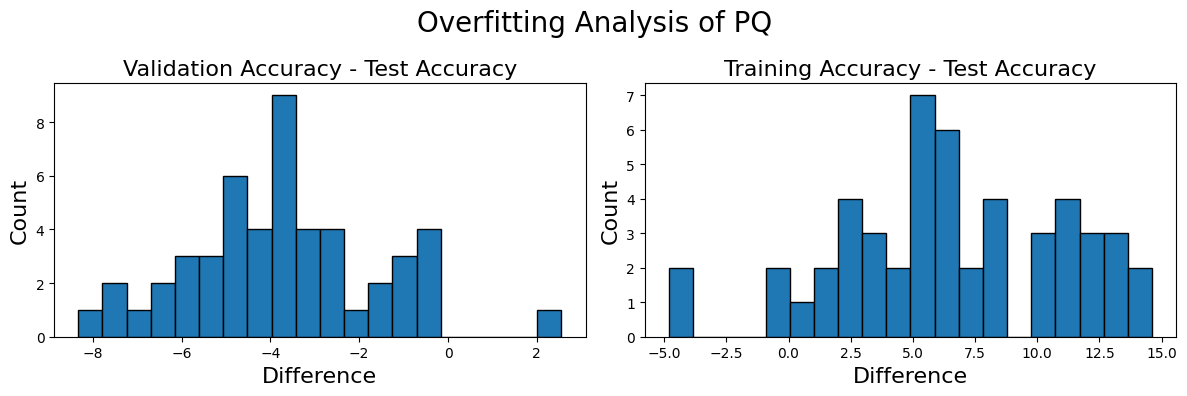

In [25]:
# 计算差值
val_minus_test = avg_val_acc_PQ - test_acc_PQ
train_minus_test = train_acc_PQ - test_acc_PQ

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Overfitting Analysis of PQ', fontsize=20)
#
axs[0].hist(val_minus_test, bins=20, edgecolor='black')
axs[0].set_title('Validation Accuracy - Test Accuracy', fontsize=16)
axs[0].set_xlabel('Difference', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)

# 训练集与测试集准确率差值的直方图
axs[1].hist(train_minus_test, bins=20, edgecolor='black')
axs[1].set_title('Training Accuracy - Test Accuracy', fontsize=16)
axs[1].set_xlabel('Difference', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)

plt.tight_layout()
plt.savefig('diff_PQ.png')
plt.show()

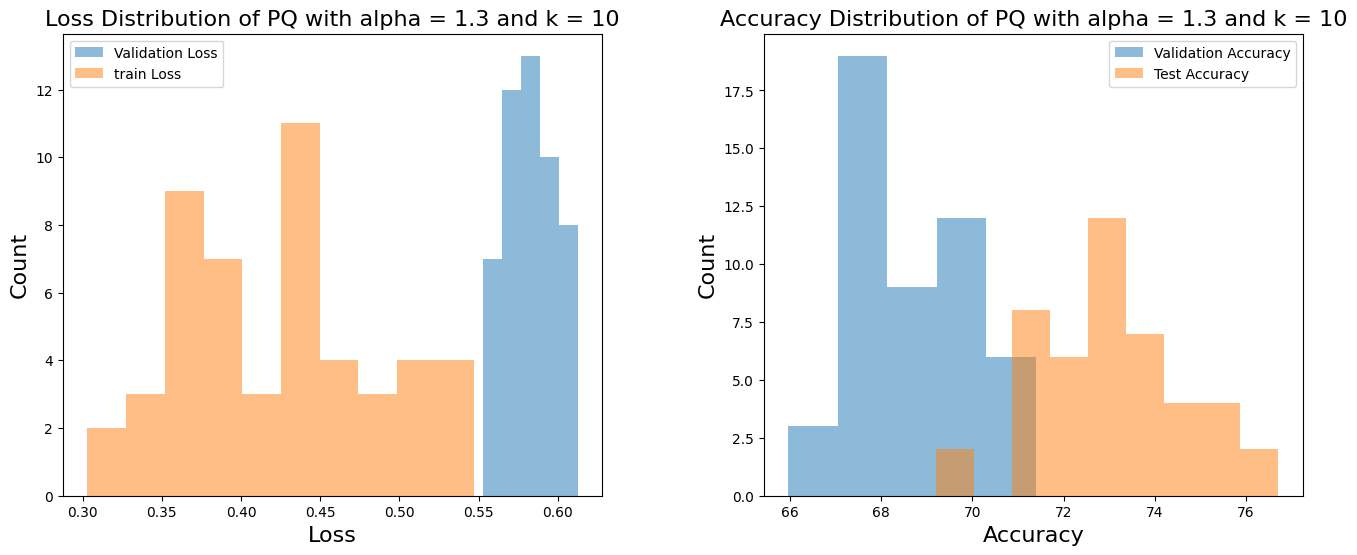

In [26]:
# 设置 x 轴范围
val_loss_range = (val_loss_mean_PQ - 2 * val_loss_std_PQ, val_loss_mean_PQ + 2 * val_loss_std_PQ)
train_loss_range = (train_loss_mean_PQ - 2 * train_loss_std_PQ, train_loss_mean_PQ + 2 * train_loss_std_PQ)
val_acc_range = (val_acc_mean_PQ - 2 * val_acc_std_PQ, val_acc_mean_PQ + 2 * val_acc_std_PQ)
test_acc_range = (test_acc_mean_PQ - 2 * test_acc_std_PQ, test_acc_mean_PQ + 2 * test_acc_std_PQ)

# 计算每个范围内的数据点数量
val_loss_counts, val_loss_bins = np.histogram(avg_val_loss_PQ, bins=5, range=val_loss_range, density=False)
train_loss_counts, train_loss_bins = np.histogram(train_loss_PQ, bins=10, range=train_loss_range, density=False)
val_acc_counts, val_acc_bins = np.histogram(avg_val_acc_PQ, bins=5, range=val_acc_range, density=False)
test_acc_counts, test_acc_bins = np.histogram(test_acc_PQ, bins=10, range=test_acc_range, density=False)

# 设置图形大小
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制第一个柱状图
ax1.bar(val_loss_bins[:-1], val_loss_counts, width=val_loss_bins[1] - val_loss_bins[0], alpha=0.5, label='Validation Loss')
ax1.bar(train_loss_bins[:-1], train_loss_counts, width=train_loss_bins[1] - train_loss_bins[0], alpha=0.5, label='train Loss')
ax1.set_title('Loss Distribution of PQ with alpha = 1.3 and k = 10', fontsize=16)
ax1.set_xlabel('Loss', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.legend()

# 绘制第二个柱状图
ax2.bar(val_acc_bins[:-1], val_acc_counts, width=val_acc_bins[1] - val_acc_bins[0], alpha=0.5, label='Validation Accuracy')
ax2.bar(test_acc_bins[:-1], test_acc_counts, width=test_acc_bins[1] - test_acc_bins[0], alpha=0.5, label='Test Accuracy')
ax2.set_title('Accuracy Distribution of PQ with alpha = 1.3 and k = 10', fontsize=16)
ax2.set_xlabel('Accuracy', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.legend()

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)
plt.savefig('distribution_PQ.png')
# 显示图形
plt.show()

In [27]:
with open('/kaggle/input/result-statistics/Cross_result_summary.csv', 'r') as file:
    reader = csv.reader(file)
    # 跳过标题行
    next(reader)

    # 创建两个空列表来存储提取出的浮点数
    test_acc_CROSS = []

    # 遍历每一行
    for row in reader:
        # 假设第一列和第二列是你要处理的那两列
        value_str2 = row[4]

        # 处理第二列
        start = value_str2.find('(') + 1
        end = value_str2.find(',')
        float_str2 = value_str2[start:end]
        value_float2 = float(float_str2)
        test_acc_CROSS.append(value_float2)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/kaggle/input/result-statistics/Cross_result_summary.csv')

file_path = '/kaggle/input/with-train/CROSS_output.csv'
df = pd.read_csv(file_path)

# 计算每个Run的平均值
mean_df = df.groupby('Run').mean()
# 提取所需的列
run = data['Run']
avg_val_loss_CROSS = mean_df['Val Loss']
avg_val_acc_CROSS = mean_df['Val Accuracy']
train_loss_CROSS = mean_df['Train Loss']
train_acc_CROSS = mean_df['Train Accuracy']
test_acc_CROSS = test_acc_CROSS

val_acc_mean_CROSS = np.mean(avg_val_acc_CROSS)
val_acc_std_CROSS = np.std(avg_val_acc_CROSS)
test_acc_mean_CROSS = np.mean(test_acc_CROSS)
test_acc_std_CROSS = np.std(test_acc_CROSS)

val_loss_mean_CROSS = np.mean(avg_val_loss_CROSS)
val_loss_std_CROSS = np.std(avg_val_loss_CROSS)
train_loss_mean_CROSS = np.mean(train_loss_CROSS)
train_loss_std_CROSS = np.std(train_loss_CROSS)

# # 创建二维散点图
# fig1, ax1 = plt.subplots(figsize=(12, 8))

# # 绘制第一条折线
# ax1.plot(data['Run'], avg_val_loss_CROSS, marker='o', label='avg_val_loss')

# # 绘制第二条折线
# ax1.plot(data['Run'], train_loss_CROSS, marker='s', label='train_loss')

# # 设置标题和坐标轴标签
# ax1.set_title('loss of CROSS', fontsize = 16)
# ax1.set_xlabel('times of run')
# ax1.set_ylabel('loss')
# # 添加独立的图例

# ax1.text(
#     0, 1, 
#     f"Validation Loss Mean: {val_loss_mean_CROSS:.2f}, Validation Loss Std: {val_loss_std_CROSS:.2f}\n"
#     f"train Loss Mean: {train_loss_mean_CROSS:.2f}, train Loss Std: {train_loss_std_CROSS:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax1.transAxes
# )

# # 显示图例
# ax1.legend()

# fig2, ax2 = plt.subplots(figsize=(12, 8))

# ax2.plot(data['Run'], avg_val_acc_CROSS, marker='o', label='avg_val_acc')
# ax2.plot(data['Run'], test_acc_CROSS, marker='s', label='test_acc')
# ax2.set_title('accuracy of CROSS with alpha = 1.3 and k = 10', fontsize=16)
# ax2.set_xlabel('times of run')
# ax2.set_ylabel('accuracy')
# ax2.legend()

# ax2.text(
#     0, 1, 
#     f"Validation Accuracy Mean: {val_acc_mean_CROSS:.2f}, Validation Accuracy Std: {val_acc_std_CROSS:.2f}\n"
#     f"Test Accuracy Mean: {test_acc_mean_CROSS:.2f}, Test Accuracy Std: {test_acc_std_CROSS:.2f}",
#     fontsize=12, ha='left', va='top', transform=ax2.transAxes
# )
# # 显示图形
# plt.show()

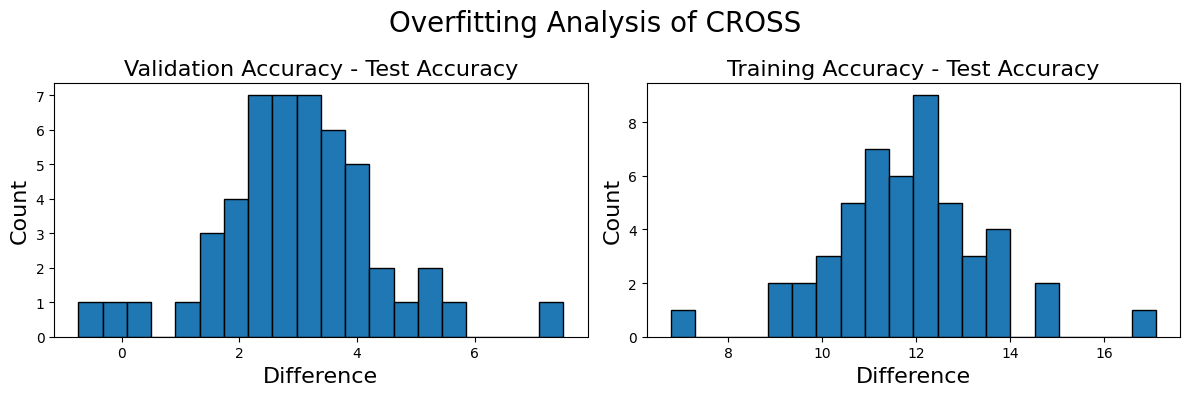

In [29]:
# 计算差值
val_minus_test = avg_val_acc_CROSS - test_acc_CROSS
train_minus_test = train_acc_CROSS - test_acc_CROSS

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Overfitting Analysis of CROSS', fontsize=20)
#
axs[0].hist(val_minus_test, bins=20, edgecolor='black')
axs[0].set_title('Validation Accuracy - Test Accuracy', fontsize=16)
axs[0].set_xlabel('Difference', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)

# 训练集与测试集准确率差值的直方图
axs[1].hist(train_minus_test, bins=20, edgecolor='black')
axs[1].set_title('Training Accuracy - Test Accuracy', fontsize=16)
axs[1].set_xlabel('Difference', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)

plt.tight_layout()
plt.savefig('diff_CROSS.png')
plt.show()

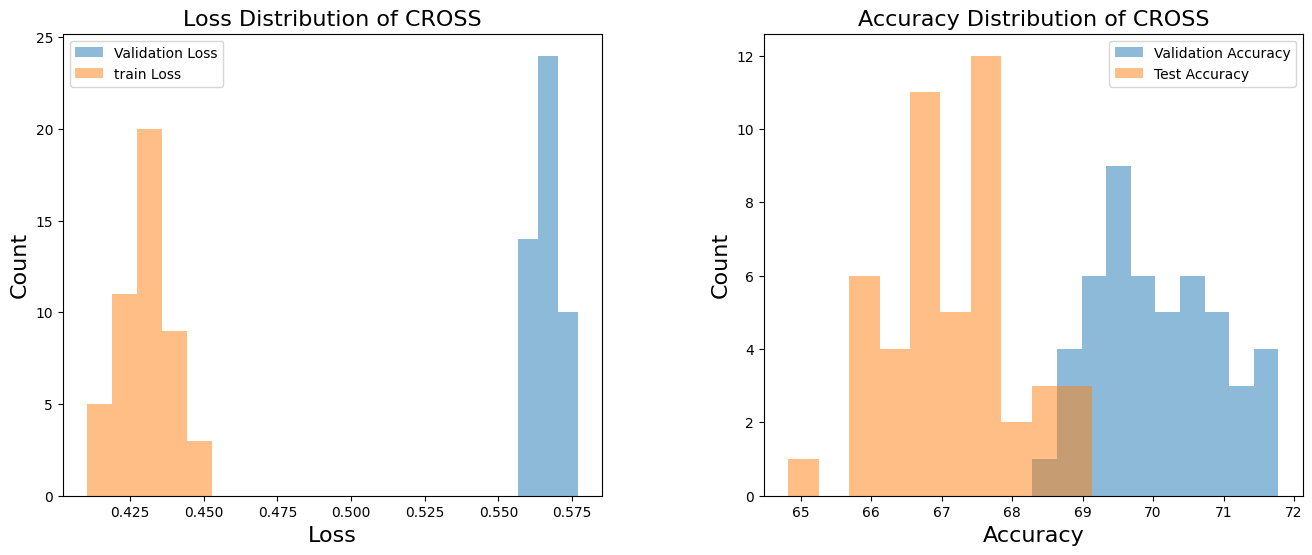

In [30]:
# 设置 x 轴范围
val_loss_range = (val_loss_mean_CROSS - 2 * val_loss_std_CROSS, val_loss_mean_CROSS + 2 * val_loss_std_CROSS)
train_loss_range = (train_loss_mean_CROSS - 2 * train_loss_std_CROSS, train_loss_mean_CROSS + 2 * train_loss_std_CROSS)
val_acc_range = (val_acc_mean_CROSS - 2 * val_acc_std_CROSS, val_acc_mean_CROSS + 2 * val_acc_std_CROSS)
test_acc_range = (test_acc_mean_CROSS - 2 * test_acc_std_CROSS, test_acc_mean_CROSS + 2 * test_acc_std_CROSS)

# 计算每个范围内的数据点数量
val_loss_counts, val_loss_bins = np.histogram(avg_val_loss_CROSS, bins=3, range=val_loss_range, density=False)
train_loss_counts, train_loss_bins = np.histogram(train_loss_CROSS, bins=5, range=train_loss_range, density=False)
val_acc_counts, val_acc_bins = np.histogram(avg_val_acc_CROSS, bins=10, range=val_acc_range, density=False)
test_acc_counts, test_acc_bins = np.histogram(test_acc_CROSS, bins=10, range=test_acc_range, density=False)

# 设置图形大小
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制第一个柱状图
ax1.bar(val_loss_bins[:-1], val_loss_counts, width=val_loss_bins[1] - val_loss_bins[0], alpha=0.5, label='Validation Loss')
ax1.bar(train_loss_bins[:-1], train_loss_counts, width=train_loss_bins[1] - train_loss_bins[0], alpha=0.5, label='train Loss')
ax1.set_title('Loss Distribution of CROSS', fontsize=16)
ax1.set_xlabel('Loss', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.legend()

# 绘制第二个柱状图
ax2.bar(val_acc_bins[:-1], val_acc_counts, width=val_acc_bins[1] - val_acc_bins[0], alpha=0.5, label='Validation Accuracy')
ax2.bar(test_acc_bins[:-1], test_acc_counts, width=test_acc_bins[1] - test_acc_bins[0], alpha=0.5, label='Test Accuracy')
ax2.set_title('Accuracy Distribution of CROSS', fontsize=16)
ax2.set_xlabel('Accuracy', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.legend()

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)
plt.savefig('distribution_CROSS.png')
# 显示图形
plt.show()

## validation statistics

In [31]:
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import MultiComparison
# Perform one-way ANOVA
statistic, p_value = f_oneway(avg_val_acc_UP, avg_val_acc_GL, avg_val_acc_PQ, avg_val_acc_CROSS)

print(f"F-statistic: {statistic:.3f}")
print(f"p-value: {p_value}")

# Proceed with post-hoc tests if ANOVA is significant
# 设定显著性水平
alpha = 0.05

# 执行配对 t 检验
print("pairwise t test:")

# avg_val_acc_UP 与 avg_val_acc_GL
t_stat, p_val = ttest_ind(avg_val_acc_UP, avg_val_acc_GL)
print(f"avg_val_acc_UP vs avg_val_acc_GL: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_UP 与 avg_val_acc_PQ
t_stat, p_val = ttest_ind(avg_val_acc_UP, avg_val_acc_PQ)
print(f"avg_val_acc_UP vs avg_val_acc_PQ: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")

# avg_val_acc_UP 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(avg_val_acc_UP, avg_val_acc_CROSS)
print(f"avg_val_acc_UP vs avg_val_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_GL 与 avg_val_acc_PQ
t_stat, p_val = ttest_ind(avg_val_acc_GL, avg_val_acc_PQ)
print(f"avg_val_acc_GL vs avg_val_acc_PQ: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_GL 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(avg_val_acc_GL, avg_val_acc_CROSS)
print(f"avg_val_acc_GL vs avg_val_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_PQ 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(avg_val_acc_PQ, avg_val_acc_CROSS)
print(f"avg_val_acc_PQ vs avg_val_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")

F-statistic: 10.190
p-value: 2.879559769629594e-06
pairwise t test:
avg_val_acc_UP vs avg_val_acc_GL: t statistic = 3.392, p value = 0.0010015026815387747
significant
avg_val_acc_UP vs avg_val_acc_PQ: t statistic = 3.497, p value = 0.0007077591509686527
significant
avg_val_acc_UP vs avg_val_acc_CROSS: t statistic = -0.740, p value = 0.46085913955940205
not significant
avg_val_acc_GL vs avg_val_acc_PQ: t statistic = 0.595, p value = 0.5533765438294607
not significant
avg_val_acc_GL vs avg_val_acc_CROSS: t statistic = -4.355, p value = 3.278426697685044e-05
significant
avg_val_acc_PQ vs avg_val_acc_CROSS: t statistic = -4.280, p value = 4.358898371573977e-05
significant


In [32]:
!pip install scikit-posthocs

In [33]:
ANOVA_data = pd.DataFrame({
    'UP': avg_val_acc_UP,
    'GL': avg_val_acc_GL,
    'PQ': avg_val_acc_PQ,
    'CROSS':avg_val_acc_CROSS
})

import scikit_posthocs as sp

# 将数据转换为长格式
ANOVA_data_long = ANOVA_data.melt(var_name='Group', value_name='Accuracy')

# 使用Dunn's post-hoc检验
posthoc_results = sp.posthoc_dunn(ANOVA_data_long, val_col='Accuracy', group_col='Group', p_adjust='bonferroni')

# 添加标题并显示结果
#posthoc_results.columns.name = 'Group'
#posthoc_results.index.name = 'Group'
print(posthoc_results)

          CROSS        GL        PQ        UP
CROSS  1.000000  0.000521  0.000404  1.000000
GL     0.000521  1.000000  1.000000  0.005816
PQ     0.000404  1.000000  1.000000  0.004681
UP     1.000000  0.005816  0.004681  1.000000


In [34]:
posthoc_results = sp.posthoc_dunn(ANOVA_data_long, val_col='Accuracy', group_col='Group', p_adjust='holm')
print(posthoc_results)

          CROSS        GL        PQ       UP
CROSS  1.000000  0.000434  0.000404  1.00000
GL     0.000434  1.000000  1.000000  0.00312
PQ     0.000404  1.000000  1.000000  0.00312
UP     1.000000  0.003120  0.003120  1.00000


In [35]:
import math

# 计算每组标准差
std1 = (sum([(x - val_acc_mean_UP)**2 for x in avg_val_acc_UP]) / (len(avg_val_acc_UP) - 1))**0.5
std2 = (sum([(x - val_acc_mean_GL)**2 for x in avg_val_acc_GL]) / (len(avg_val_acc_GL) - 1))**0.5  
std3 = (sum([(x - val_acc_mean_PQ)**2 for x in avg_val_acc_PQ]) / (len(avg_val_acc_PQ) - 1))**0.5
std4 = (sum([(x - val_acc_mean_CROSS)**2 for x in avg_val_acc_CROSS]) / (len(avg_val_acc_CROSS) - 1))**0.5

# 计算每组标准误差
se1 = std1 / math.sqrt(len(avg_val_acc_UP))
se2 = std2 / math.sqrt(len(avg_val_acc_GL))
se3 = std3 / math.sqrt(len(avg_val_acc_PQ))
se4 = std4 / math.sqrt(len(avg_val_acc_CROSS))

print("UP std error:", se1)
print("GL:", se2) 
print("PQ:", se3)
print("CROSS:", se4)

UP std error: 0.1443063924362299
GL: 0.14755453575003422
PQ: 0.19375684332878337
CROSS: 0.12470062108088778


## test statistics

In [36]:
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import MultiComparison
# Perform one-way ANOVA
statistic, p_value = f_oneway(test_acc_UP, test_acc_GL, test_acc_PQ, test_acc_CROSS)

print(f"F-statistic: {statistic:.3f}")
print(f"p-value: {p_value}")

# Proceed with post-hoc tests if ANOVA is significant
# 设定显著性水平
alpha = 0.05

# 执行配对 t 检验
print("pairwise t test:")

# avg_val_acc_UP 与 avg_val_acc_GL
t_stat, p_val = ttest_ind(test_acc_UP, test_acc_GL)
print(f"test_acc_UP vs test_acc_GL: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_UP 与 avg_val_acc_PQ
t_stat, p_val = ttest_ind(test_acc_UP, test_acc_PQ)
print(f"test_acc_UP vs test_acc_PQ: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")

# avg_val_acc_UP 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(test_acc_UP, test_acc_CROSS)
print(f"test_acc_UP vs test_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_GL 与 avg_val_acc_PQ
t_stat, p_val = ttest_ind(test_acc_GL, test_acc_PQ)
print(f"test_acc_GL vs test_acc_PQ: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_GL 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(test_acc_GL, test_acc_CROSS)
print(f"test_acc_GL vs test_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")
    
# avg_val_acc_PQ 与 avg_val_acc_CROSS
t_stat, p_val = ttest_ind(test_acc_PQ, test_acc_CROSS)
print(f"test_acc_PQ vs test_acc_CROSS: t statistic = {t_stat:.3f}, p value = {p_val}")
if p_val < alpha:
    print("significant")
else:
    print("not significant")

F-statistic: 92.740
p-value: 2.140354453606556e-37
pairwise t test:
test_acc_UP vs test_acc_GL: t statistic = -3.499, p value = 0.0007037086889703417
significant
test_acc_UP vs test_acc_PQ: t statistic = -2.793, p value = 0.006271662287215906
significant
test_acc_UP vs test_acc_CROSS: t statistic = 11.255, p value = 2.348678941464891e-19
significant
test_acc_GL vs test_acc_PQ: t statistic = 0.836, p value = 0.4051782003561386
not significant
test_acc_GL vs test_acc_CROSS: t statistic = 17.636, p value = 3.603632658708214e-32
significant
test_acc_PQ vs test_acc_CROSS: t statistic = 17.153, p value = 2.835767974376249e-31
significant


In [37]:
ANOVA_data = pd.DataFrame({
    'UP': test_acc_UP,
    'GL': test_acc_GL,
    'PQ': test_acc_PQ,
    'CROSS':test_acc_CROSS
})

In [38]:
import scikit_posthocs as sp

# 将数据转换为长格式
ANOVA_data_long = ANOVA_data.melt(var_name='Group', value_name='Accuracy')

# 使用Dunn's post-hoc检验
posthoc_results = sp.posthoc_dunn(ANOVA_data_long, val_col='Accuracy', group_col='Group', p_adjust='holm')

# 添加标题并显示结果
#posthoc_results.columns.name = 'Group'
#posthoc_results.index.name = 'Group'
print(posthoc_results)

              CROSS            GL            PQ            UP
CROSS  1.000000e+00  1.059352e-19  1.436116e-17  2.780030e-10
GL     1.059352e-19  1.000000e+00  5.759894e-01  1.766651e-02
PQ     1.436116e-17  5.759894e-01  1.000000e+00  5.637667e-02
UP     2.780030e-10  1.766651e-02  5.637667e-02  1.000000e+00


In [39]:
sp.posthoc_dunn(ANOVA_data_long,val_col='Accuracy', group_col='Group',p_adjust = 'bonferroni')

,CROSS,GL,PQ,UP
CROSS,1.000000e+00,1.059352e-19,1.723339e-17,4.170045e-10
GL,1.059352e-19,1.000000e+00,1.000000e+00,3.533302e-02
PQ,1.723339e-17,1.000000e+00,1.000000e+00,1.691300e-01
UP,4.170045e-10,3.533302e-02,1.691300e-01,1.000000e+00


In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 假设你有一个 DataFrame df 包含以下列
df = pd.DataFrame({
    'train_acc_UP': train_acc_UP,
    'test_acc_UP': test_acc_UP,
    'train_acc_GL': train_acc_GL,
    'test_acc_GL': test_acc_GL,
    'train_acc_PQ': train_acc_PQ,
    'test_acc_PQ': test_acc_PQ,
    'train_acc_CROSS': train_acc_CROSS,
    'test_acc_CROSS': test_acc_CROSS
})

# 将数据从宽格式转换为长格式
df_long = pd.melt(df, 
                  var_name='Group_TrainTest', 
                  value_name='Accuracy', 
                  value_vars=['train_acc_UP', 'test_acc_UP', 
                              'train_acc_GL', 'test_acc_GL', 
                              'train_acc_PQ', 'test_acc_PQ', 
                              'train_acc_CROSS', 'test_acc_CROSS'])

# 提取Group和TrainTest的变量
df_long['Group'] = df_long['Group_TrainTest'].str.extract(r'_(UP|GL|PQ|CROSS)')
df_long['TrainTest'] = df_long['Group_TrainTest'].str.extract(r'(train|test)')

# 删除临时的Group_TrainTest列
df_long.drop(columns='Group_TrainTest', inplace=True)

# 查看整理后的数据
print(df_long.head())


   Accuracy Group TrainTest
0   86.8975    UP     train
1   87.9375    UP     train
2   83.3875    UP     train
3   85.2525    UP     train
4   84.9775    UP     train


In [41]:
# create linear model
model = ols('Accuracy ~ C(Group) * C(TrainTest)', data=df_long).fit()

# 使用 anova_lm 进行方差分析
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                            sum_sq     df            F         PR(>F)
C(Group)               1289.352933    3.0    62.454185   5.039104e-33
C(TrainTest)           8796.343695    1.0  1278.242272  1.914514e-125
C(Group):C(TrainTest)   881.243266    3.0    42.686008   6.860281e-24
Residual               2697.584647  392.0          NaN            NaN
